In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder

# Financial Fraud Detection

### Dataset Knowledge
The dataset is financial transaction data presumiably from a type of bank. This dataset has already been encoded 

### Features
● Step: A unit of time that represents hours in the dataset. 

● Type: The type of transaction 

● Amount: The amount of money transferred 

● NameOrig: The origin account name

● OldBalanceOrg: The origin accounts balance before the transaction 

● NewBalanceOrg: The origin accounts balance after the transaction 

● NameDest: The destination account name 

● OldbalanceDest: The destination accounts balance before the transaction 

● NewbalanceDest: The destination accounts balance after the transaction 

● IsFraud: Was this simulated transaction actually fraudulent? In this case, we consider “fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank account before the account owner could secure their information. 

● IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is greater than 200,000. This column does not seem to have any benefit and will be removed in the cleaning process



In [3]:
financials = pd.read_csv("/Users/sa12/Documents/Repositories/FinancialFraudDetection/FraudData/financials.csv", index_col=0)

In [3]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362620 entries, 1 to 743
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 534.0+ MB


These are some ugly column names. gonna change them to something simpiler and maintain specifictiy.

In [15]:
financials.rename(columns={'amount':'Amount','oldbalanceOrg':'OldOrig','newbalanceOrig':'NewOrig','oldbalanceDest':'OldDest','newbalanceDest':'NewDest'}, inplace=True)
financials.head()

,type,Amount,nameOrig,OldOrig,NewOrig,nameDest,OldDest,NewDest,isFraud,isFlaggedFraud
step,,,,,,,,,,
1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


The nameOrig and nameDest column identify the individual accounts involved. While it might be useful to police to identify who is commiting fraud, it is not valuable to our model to predict if fraud is occuring. We can drop these rows in the cleaning process.

In [17]:
financials.describe()

,Amount,OldOrig,NewOrig,OldDest,NewDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Univariate Analysis

My first steps will be analyze the two catagorical columns, type
 the distribution o

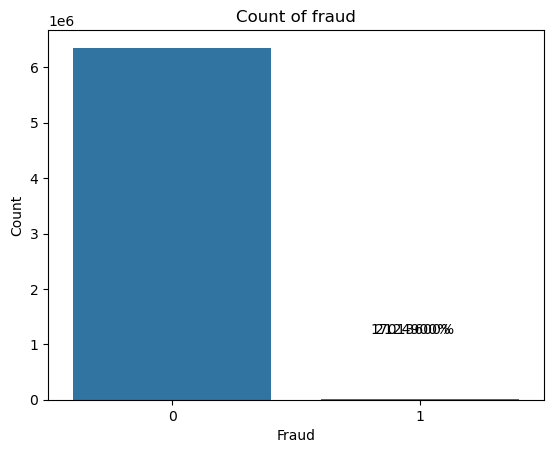

In [51]:
fig = sns.countplot(data=financials, x='isFraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Count of fraud')
plt.show()

Fraud cases are very much in the minority.

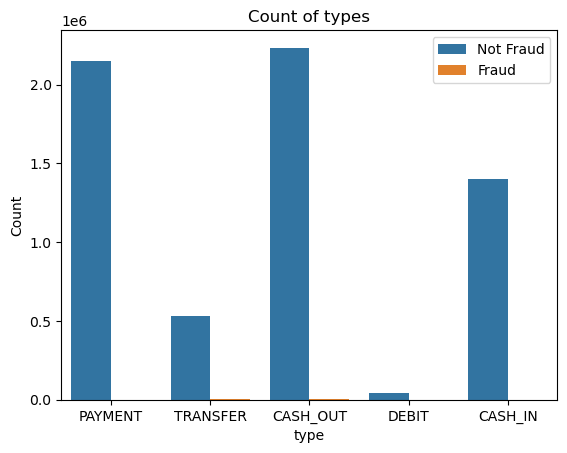

In [55]:
sns.countplot(data=financials, x='type', hue='isFraud')
plt.xlabel('type')
plt.ylabel('Count')
plt.title('Count of types')
plt.legend(['Not Fraud', 'Fraud'])
plt.show()

Tough to see anything on this chart, but it looks as though fraud is only in the tranfer and cash out types. I am going to produce another visulazation to see this relationship clearer.

In [5]:
financials.groupby('type')['isFraud'].value_counts().plot(kind='barh')

pandas.core.groupby.generic.DataFrameGroupBy

It seems fraud is localized within the CASH_OUT and TRANSFER types. In order to make our dataset easier to navigate and interperate, seperating out these types could be useful. Creating additional dataframes to contain only fraudulent and non fraudulent data could also be useful.

In [16]:
#creating a dataframe of the CASH_OUT and TRANFER types, encompassing all of our fraud data
tiny_financials = financials[(financials['type'] == 'CASH_OUT') | (financials['type'] == 'TRANSFER')]
#create seperate dataframe with Fraud and Not Fraud exclusively
fraud = financials[financials['isFraud'] == 1]
not_fraud = financials[financials['isFraud'] == 0]
flagged_fraud = financials[financials['isFlaggedFraud'] == 1]

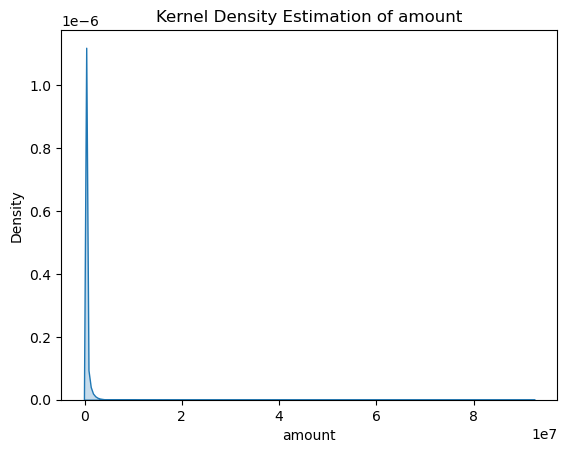

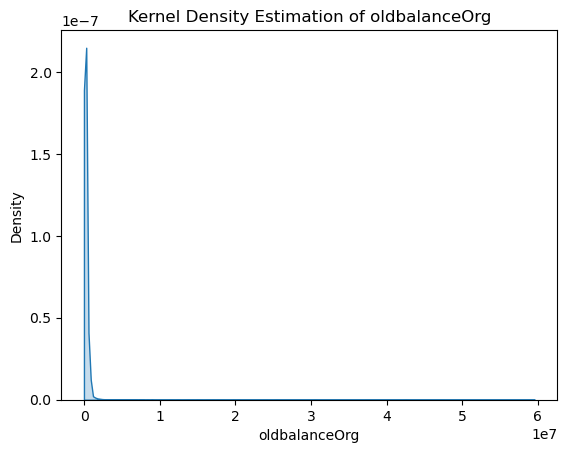

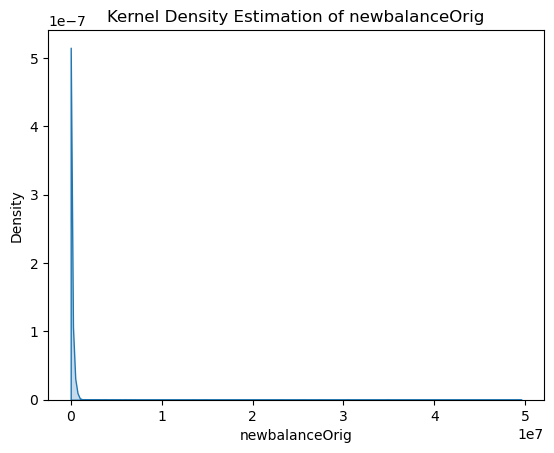

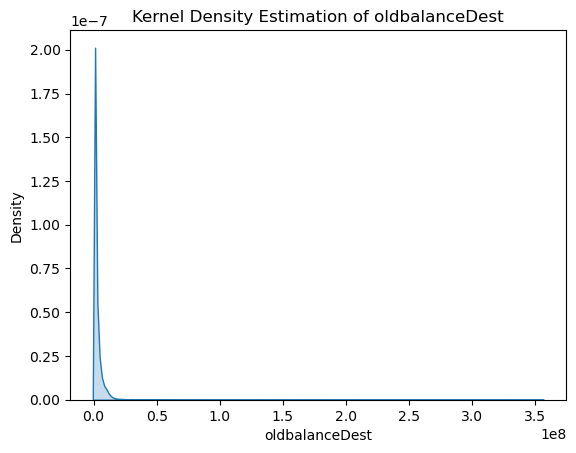

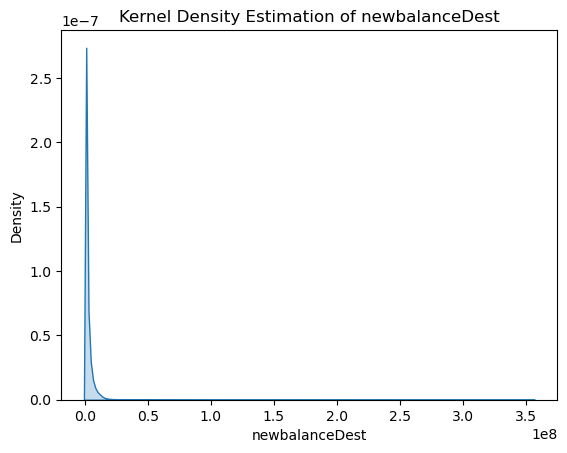

In [9]:
#remove non numeric columns for comparisons
num_tiny_financials = tiny_financials.drop(columns=['nameOrig', 'nameDest', 'isFraud','isFlaggedFraud','type'])
# Iterate over each feature column and plot kde plot
for feature in num_tiny_financials.columns:
    sns.kdeplot(data=num_tiny_financials, x=feature, fill=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation of {feature}')
    plt.show()

All of the data is skew to the right. We also see two large bumps in both amount and OldOrig on the far right of the graph. These may indicate outliers. I am going to produce a similar chart, only looking at fraudulent transactions.

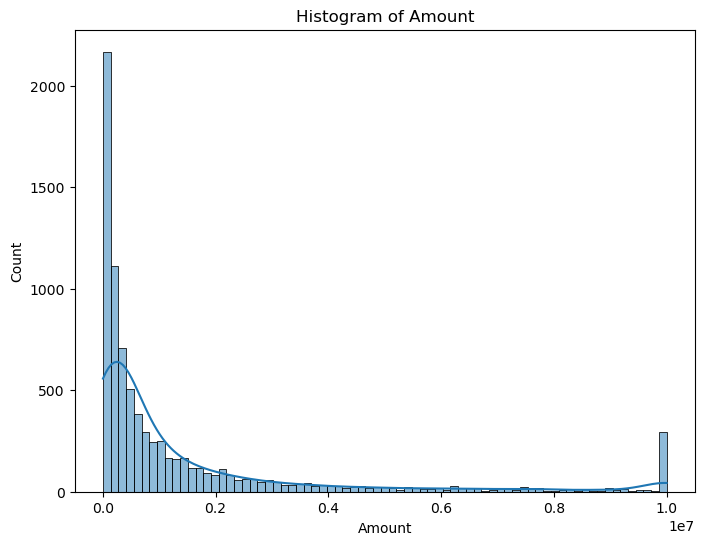

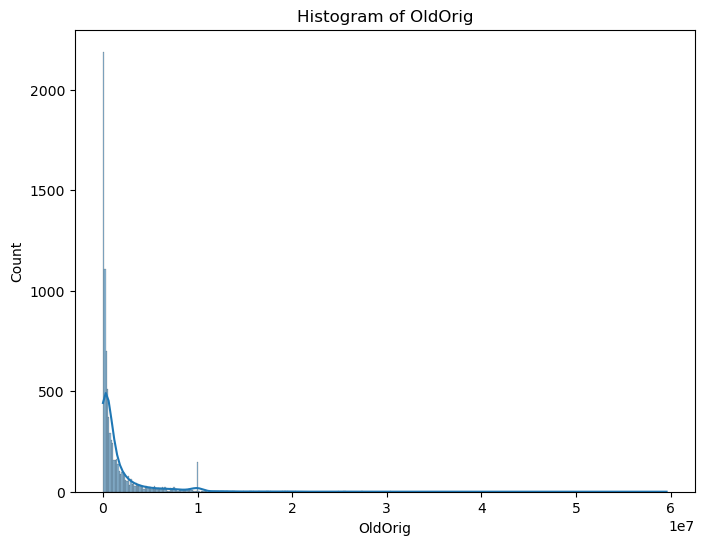

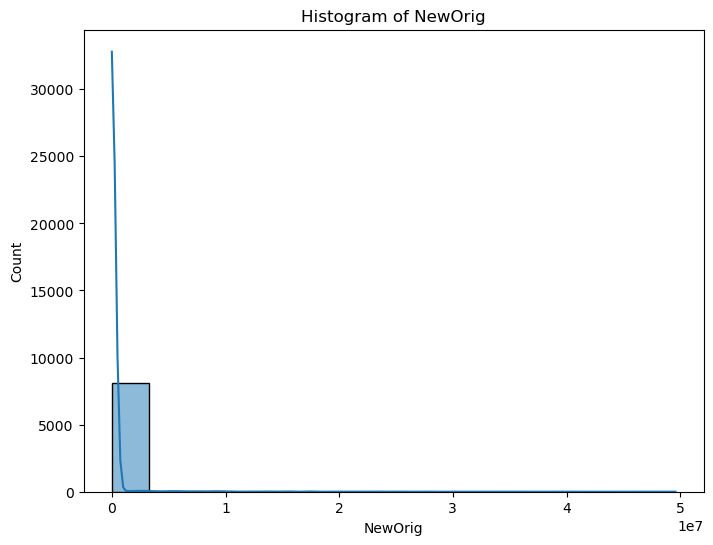

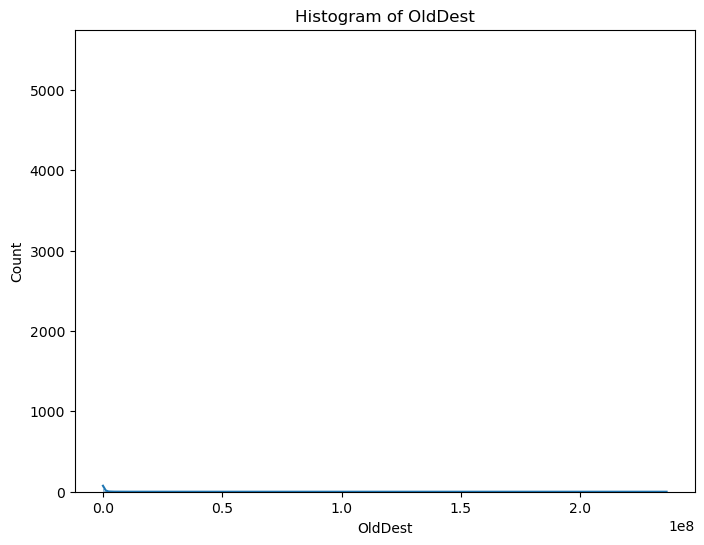

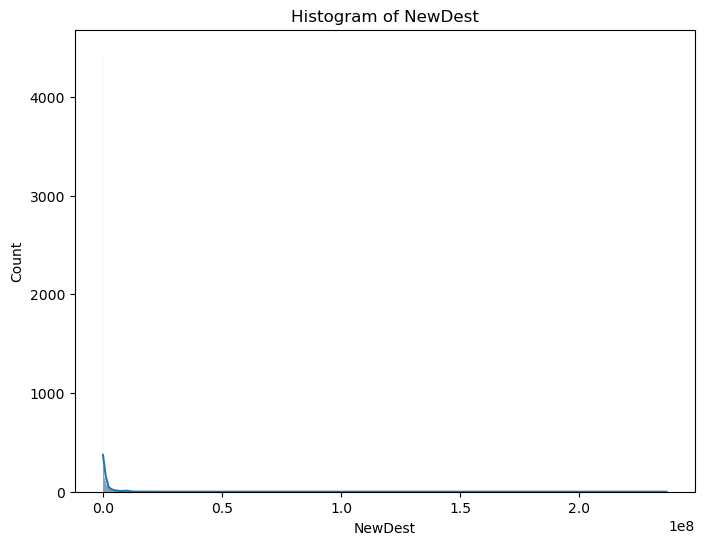

In [29]:
for feature in fraud:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=fraud, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

There is also a heavy right skew here. We also can see a large bump in the amount column. This indicates a large amount of values concentrated in large amounts when looking specifically at fraud.

In [22]:
fraud['Amount'].value_counts()
#there seems to be a collection of values in fraud. Let's compare to non fraud

Amount
10000000.00    287
0.00            16
1165187.89       4
429257.45        4
181.00           2
              ... 
149668.66        1
7316255.05       1
222048.71        1
9585040.37       1
234377.29        1
Name: count, Length: 3977, dtype: int64

In [11]:
not_fraud['amount'].value_counts()
#the value also appears here so it does not seem to be related

amount
10000000.00    2920
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
239031.78         1
123022.99         1
42540.14          1
159879.06         1
82096.45          1
Name: count, Length: 5313650, dtype: int64

## Bivariate Analysis

There seems to be a large range in numerical columns. I'm going to create a standarized range to so my visualizations can make sense. To begin my bivariate analysis, I'm going to create a pairplot of numerical columns and color them by fraud or not.

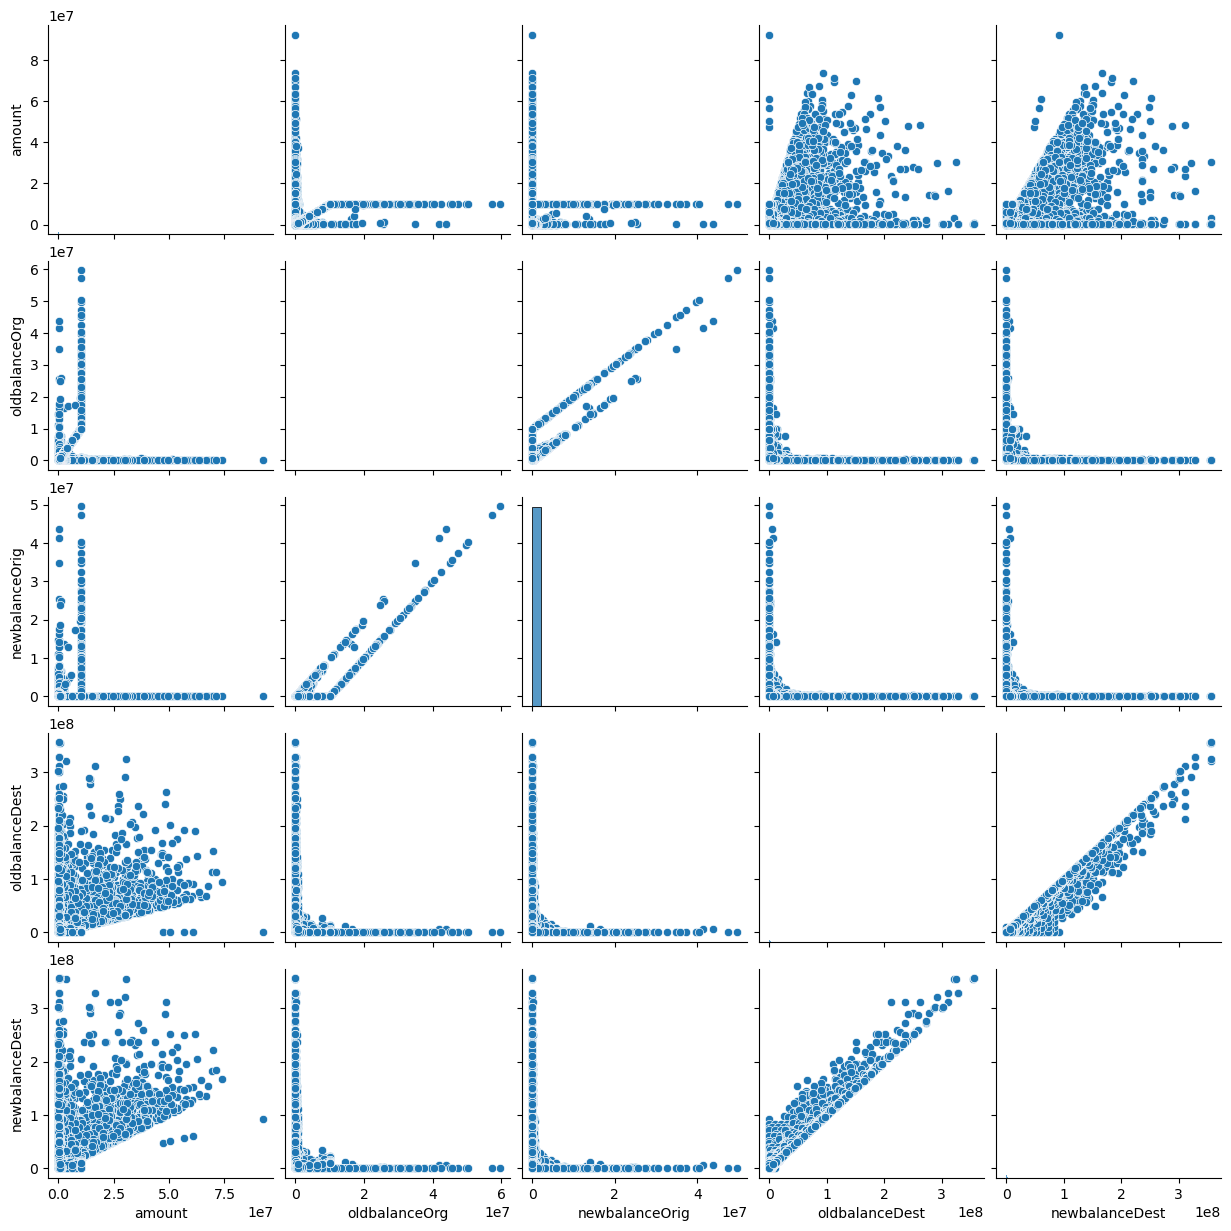

In [12]:
sns.pairplot(num_tiny_financials)

This visulaisation shows us the bivariate distibution of numerical columns in the type-filtered dataset. It's hard to come to any conclusions, but it allows us to see the natural disributions of the data.

Continuing the bivariate analysis,I am going to create a heatmap to see correlation between the features, including

<Axes: >

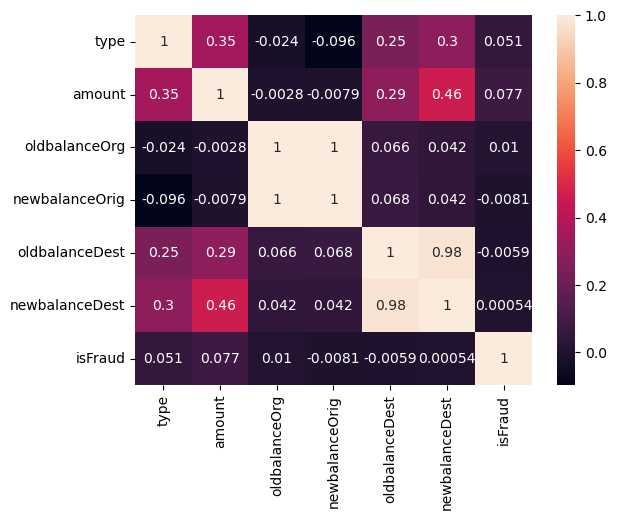

In [8]:
#dropping non-numerical catagories in the fraud dataset.
corr_financials = financials.drop(columns=['nameOrig', 'nameDest','isFlaggedFraud'])
#remap the type column to ints to see if they may be correlated as well
corr_financials['type'] = corr_financials['type'].map({'PAYMENT':0,'CASH_OUT':1,'CASH IN':2,'TRANSFER':3,'DEBIT':4})
#we want to find correlation between the values in fraud so i will create a heatmap
sns.heatmap(corr_financials.corr(),annot=True)

The OldDest column seems to be the one with the highest correlation amoung fraud cases. The strongest correlation seems to be between the old destination account and the amount tranfered.

Text(0.5, 1.0, 'Not Fraud')

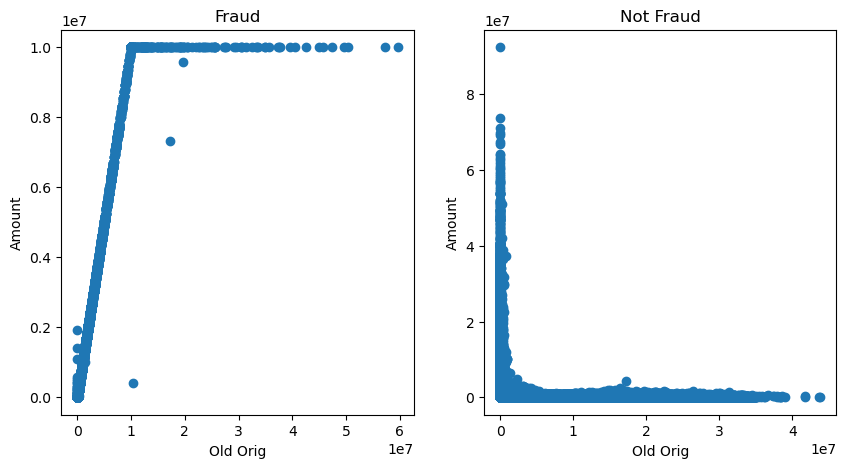

In [55]:
plt.figure(figsize=(10, 5)) # Adjust figure size as needed
plt.tight_layout() # Adjusts subplot params for a tight layout
plt.subplot(1, 2, 1)  # First subplot (2 row, 2 columns, 1st position)
plt.scatter(fraud['OldOrig'], fraud['Amount'])
plt.xlabel('Old Orig')
plt.ylabel('Amount')
plt.title('Fraud')
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, 2nd position)
plt.scatter(not_fraud['OldOrig'], not_fraud['Amount'])
plt.xlabel('Old Orig')
plt.ylabel('Amount')
plt.title('Not Fraud')
plt.show()

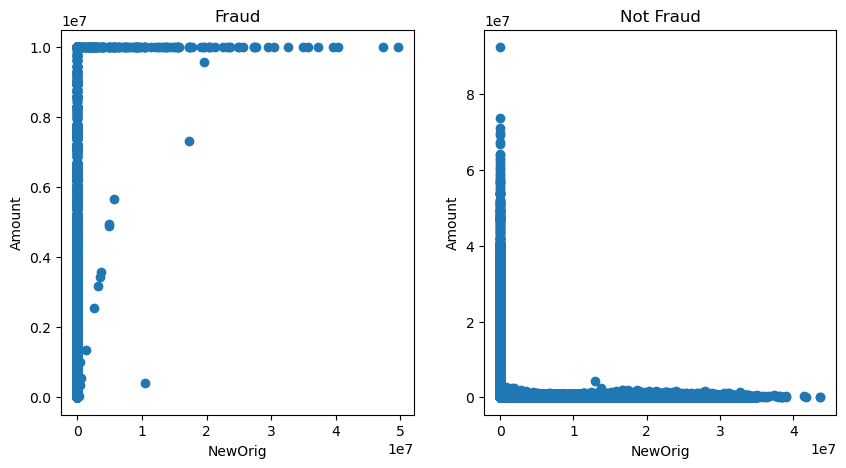

In [56]:
plt.figure(figsize=(10, 5)) # Adjust figure size as needed
plt.tight_layout() # Adjusts subplot params for a tight layout
plt.subplot(1, 2, 1)  # First subplot (2 row, 2 columns, 1st position)
plt.scatter(fraud['NewOrig'], fraud['Amount'])
plt.xlabel('NewOrig')
plt.ylabel('Amount')
plt.title('Fraud')
plt.subplot(1, 2, 2)  # Second subplot (2 row, 2 columns, 2nd position)
plt.scatter(not_fraud['NewOrig'], not_fraud['Amount'])
plt.xlabel('NewOrig')
plt.ylabel('Amount')
plt.title('Not Fraud')
plt.show()

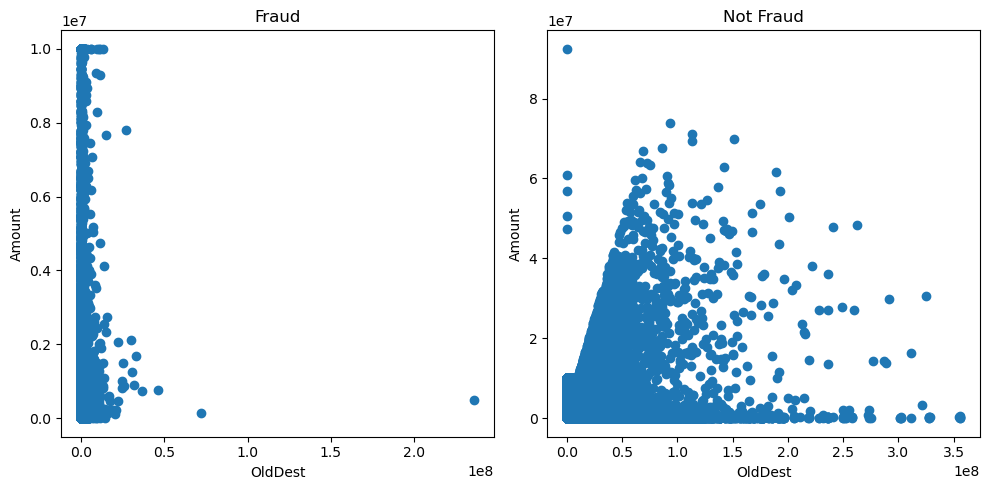

In [57]:
plt.figure(figsize=(10, 5))# Adjust figure size as needed
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, 1st position)
plt.scatter(fraud['OldDest'], fraud['Amount'])
plt.xlabel('OldDest')
plt.ylabel('Amount')
plt.title('Fraud')
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, 2nd position)
plt.scatter(not_fraud['OldDest'], not_fraud['Amount'])
plt.xlabel('OldDest')
plt.ylabel('Amount')
plt.title('Not Fraud')
plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

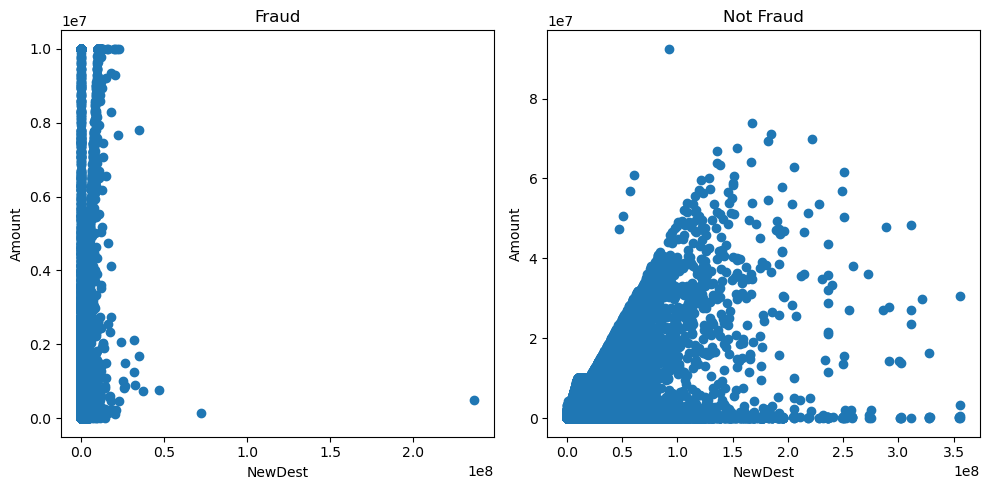

In [58]:
plt.figure(figsize=(10, 5)) # Adjust figure size as needed
plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, 1st position)
plt.scatter(fraud['NewDest'], fraud['Amount'])
plt.xlabel('NewDest')
plt.ylabel('Amount')
plt.title('Fraud')
plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, 2nd position)
plt.scatter(not_fraud['NewDest'], not_fraud['Amount'])
plt.xlabel('NewDest')
plt.ylabel('Amount')
plt.title('Not Fraud')
plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

The Old Dest and New Dest balances charts largely look identical in both columns. HOWEVER, THE OUTLIERS ARE IDENTICAL IN FRAUD CASES. This is not reflected in the not fraud column. 
##### It would seem that a lack of change between the destination accounts 

In [42]:
fraud['OldDest'].value_counts()

OldDest
0.00          5351
386985.85        1
716857.20        1
8682013.45       1
6493.14          1
              ... 
388830.36        1
261802.02        1
346223.18        1
85009.83         1
6510099.11       1
Name: count, Length: 2863, dtype: int64

In [43]:
fraud['NewDest'].value_counts()

NewDest
0.00           4091
10000000.00      53
1064995.85        2
127905.82         2
1165187.89        2
               ... 
3098931.52        1
143526.32         1
1532241.85        1
495991.64         1
7360101.63        1
Name: count, Length: 4067, dtype: int64

## Multivariate Analysis

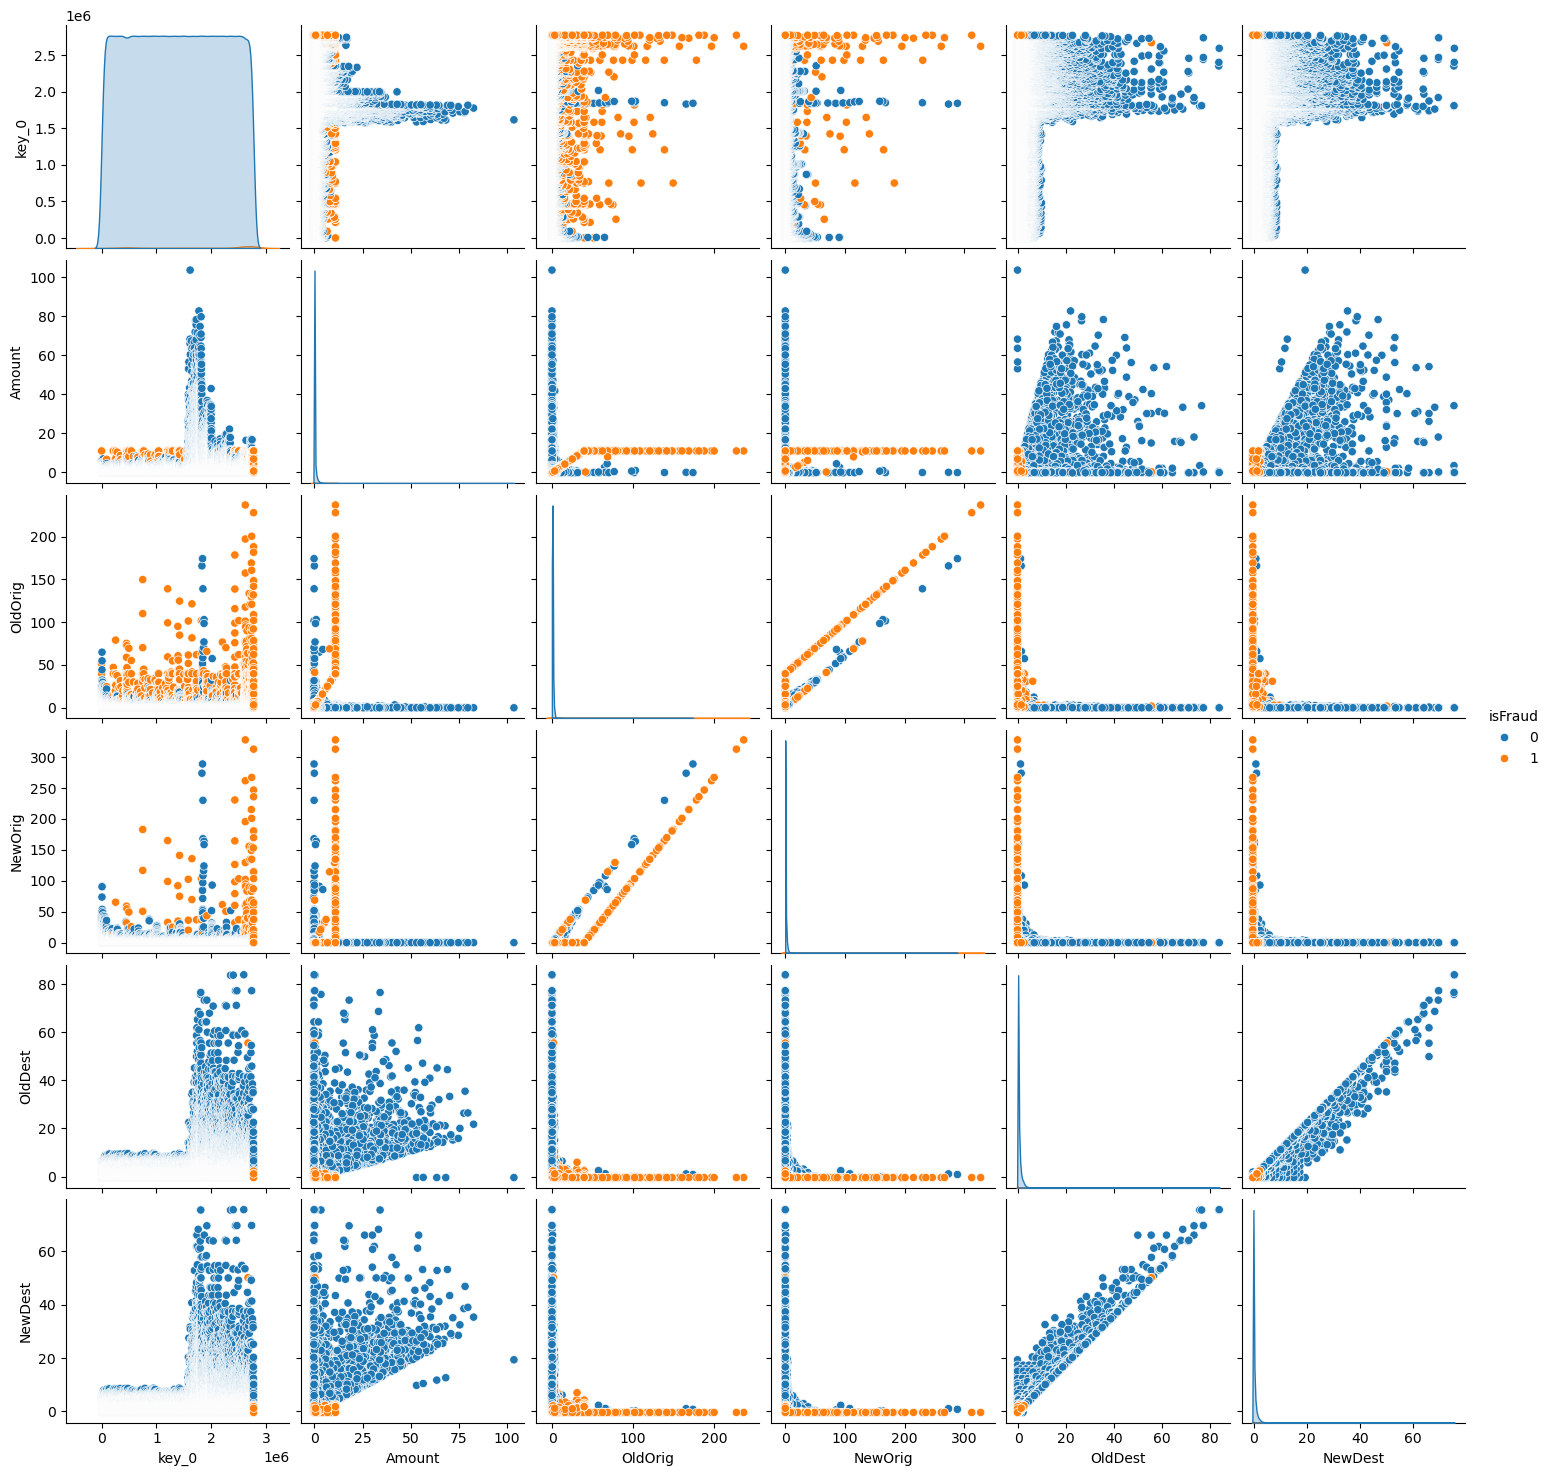

In [11]:
#seperate numerical columns
numerical_columns = ['Amount','OldOrig','NewOrig','OldDest', 'NewDest']
# create a standard scaler object
scaler = StandardScaler()
# Scale the numerical columns
scaled_values = scaler.fit_transform(tiny_financials[numerical_columns])
scaled_financials = pd.DataFrame(scaled_values, columns=(numerical_columns))
#put the isFraud column back to visualize fraud across distributions
scaled_financials = scaled_financials.merge(tiny_financials['isFraud'], how='left', on=scaled_financials.index, right_index=False)
sns.pairplot(scaled_financials, hue='isFraud')
plt.legend(['Not Fraud', 'Fraud'])
plt.show()

We can see o